# Jackknife

In [74]:
import numpy as np
import scipy.stats.stats as st
from astropy.stats import jackknife_resampling
from astropy.stats import jackknife_stats
import matplotlib.pyplot as plt
import scipy.stats as st
import plotly.plotly as py
from scipy.stats import norm
from scipy.stats import lognorm

In [73]:
N = 100

In [54]:
data = np.random.random(N)
print data

[ 0.24828179  0.39123676  0.76043712  0.44784948  0.709695    0.61340388
  0.99245452  0.33880177  0.30651232  0.17096419  0.87541685  0.87590483
  0.73938594  0.69101511  0.07451213  0.37942057  0.52904949  0.97221652
  0.10918627  0.00401032  0.52560746  0.00181866  0.49759739  0.2596199
  0.6096202   0.55059203  0.61396101  0.37067499  0.51482223  0.75786209
  0.56973163  0.21198358  0.64426955  0.5212676   0.71849763  0.20449371
  0.65677742  0.94311854  0.74564721  0.84072721  0.42353579  0.21035453
  0.89111566  0.67548911  0.18139159  0.51596634  0.79855795  0.2023953
  0.02517121  0.64250441  0.97793333  0.97178908  0.03311432  0.5953796
  0.86846518  0.01115539  0.58841025  0.26386184  0.00248238  0.59445904
  0.70240648  0.54568668  0.77674279  0.19765228  0.24011682  0.42851452
  0.00409387  0.83598817  0.74071132  0.44750188  0.09300978  0.82736821
  0.52704438  0.08207139  0.62160086  0.70776367  0.8316489   0.10604349
  0.97380857  0.38985243  0.56376825  0.46735351  0.19

In [55]:
meann = np.mean(data)
print meann

0.493195771228


In [56]:
sa = st.skew(data)
print sa

-0.0860659795706


In [57]:
def calc_avg_leave_one_out_func(func, sample):
    means = []
    for i in range(len(sample)):
        loo_sample = np.hstack([sample[:i], sample[i + 1:]])
        res = func(loo_sample)
        means.append(res)
    
    means = np.array(means)
    return means.mean(), means.var()

In [58]:
def calculate_biases(sample, mean, skew, median):
    jackknife_mean, mean_var = calc_avg_leave_one_out_func(np.mean, sample)
    just_mean = np.mean(sample)
    
    jackknife_skew, skew_var = calc_avg_leave_one_out_func(st.skew, sample)
    just_skew = st.skew(sample)
    
    jackknife_median, median_var = calc_avg_leave_one_out_func(np.median, norm_sample)
    just_median = np.median(norm_sample)

    print('Just mean error = {}'.format(abs(just_mean - mean)))
    print('Jackknife mean error = {}'.format(abs(jackknife_mean - mean)))
    print('Jackknife mean variance = {}'.format(mean_var))
    print('Mean percents = {}'.format(abs(jackknife_mean - mean) / mean))
    bias = (N - 1) * (jackknife_mean - just_mean)
    print('Bias = {}\n'.format(bias))
    
    print('Just skew error = {}'.format(abs(just_skew - skew)))
    print('Jackknife skew error = {}'.format(abs(jackknife_skew - skew)))
    print('Jackknife skew variance = {}'.format(skew_var))
    print('Skew percents = {}'.format(abs(jackknife_skew - skew) / skew))
    bias = (N - 1) * (jackknife_skew - just_skew)
    print('Bias = {}\n'.format(bias))
    
    print('Just median error = {}'.format(abs(just_median - median)))
    print('Jackknife median error = {}'.format(abs(jackknife_median - median)))
    print('Jackknife median variance = {}'.format(median_var))
    print('Median percents = {}'.format(abs(jackknife_median - median) / median))
    bias = (N - 1) * (jackknife_median - just_median)
    print('Bias = {}'.format(bias))

# Log Normal Distribution

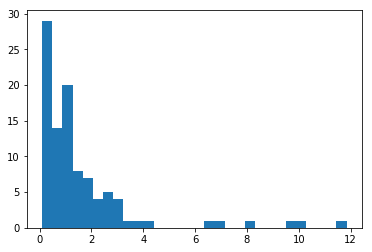

In [84]:
log_norm = st.lognorm(1.0)
mean, var, skew, kurt = log_norm.stats(moments='mvsk')
median = log_norm.ppf(0.5)

lognorm_sample = log_norm.rvs(N)

plt.hist(lognorm_sample, bins=30);
plt.show()

In [85]:
calculate_biases(lognorm_sample, mean, skew, median)

Just mean error = 0.019760738659
Jackknife mean error = 0.019760738659
Jackknife mean variance = 0.000441518616926
Mean percents = 0.0119854938553
Bias = 0.0

Just skew error = 3.2218294895
Jackknife skew error = 3.22248673354
Jackknife skew variance = 0.00233897826845
Skew percents = 0.52102679832
Bias = -0.0650671601174

Just median error = 1.04826265613
Jackknife median error = 1.04826265613
Jackknife median variance = 3.72038672677e-05
Median percents = 1.04826265613
Bias = 0.0


# Normal Distribution

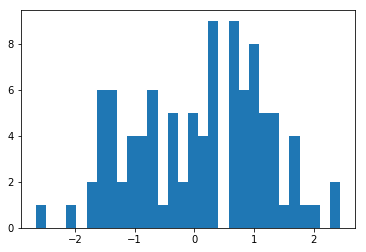

In [88]:
norm = st.norm()
mean, var, skew, kurt = norm.stats(moments='mvsk')
median = norm.ppf(0.5)

norm_sample = norm.rvs(N)

plt.hist(norm_sample, bins=30);
plt.show()

In [64]:
calculate_biases(norm_sample, mean, skew, median)

Just mean error = 0.0382221093822
Jackknife mean error = 0.0382221093822
Jackknife mean variance = 7.95636265628e-05
Mean percents = inf
Bias = -6.86950496487e-16

Just skew error = 0.135791029503
Jackknife skew error = 0.136003966713
Jackknife skew variance = 0.000714606135649
Skew percents = inf
Bias = 0.021080783824

Just median error = 0.0482626561251
Jackknife median error = 0.0482626561251
Jackknife median variance = 3.72038672677e-05
Median percents = inf
Bias = 0.0


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in double_scalars

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning:

divide by zero encountered in double_scalars

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning:

divide by zero encountered in double_scalars



In [65]:
me = np.median(data)
print me

0.526325919223


In [66]:
resamples = jackknife_resampling(data)
resamples

array([[ 0.39123676,  0.76043712,  0.44784948, ...,  0.19143221,
         0.21687731,  0.54409463],
       [ 0.24828179,  0.76043712,  0.44784948, ...,  0.19143221,
         0.21687731,  0.54409463],
       [ 0.24828179,  0.39123676,  0.44784948, ...,  0.19143221,
         0.21687731,  0.54409463],
       ..., 
       [ 0.24828179,  0.39123676,  0.76043712, ...,  0.6116155 ,
         0.21687731,  0.54409463],
       [ 0.24828179,  0.39123676,  0.76043712, ...,  0.6116155 ,
         0.19143221,  0.54409463],
       [ 0.24828179,  0.39123676,  0.76043712, ...,  0.6116155 ,
         0.19143221,  0.21687731]])

In [68]:
resamples.shape

(100, 99)

In [69]:
test_statistic = np.mean

In [70]:
meannb = np.mean(resamples)
print meannb

0.493195771228


In [13]:
estimate, bias, stderr, conf_interval = jackknife_stats(data, test_statistic, 0.95)

In [14]:
estimate

0.48179995626502442

In [15]:
bias

1.099120794378905e-14

In [16]:
stderr

0.025809392751893444

In [17]:
conf_interval

array([ 0.43121448,  0.53238544])

In [18]:
test_statistic = lambda x: (np.mean(x), np.var(x))

In [19]:
estimate, bias, stderr, conf_interval = jackknife_stats(data, test_statistic, 0.95)

In [20]:
estimate

array([ 0.48179996,  0.06661248])

In [21]:
bias

array([  1.09912079e-14,  -6.66124754e-04])

In [22]:
conf_interval

array([[ 0.43121448,  0.05333065],
       [ 0.53238544,  0.0798943 ]])

In [34]:
# estimate of the variance of an estimator
jackknife_var(data, np.std)

0.00017517566107976549